# Primalidade
Um número inteiro $n\geq 1$ é *primo* se tem exatamente dois divisores. 

Um dos documentos mais antigos conhecidos que trata de números primos é o Papiro de Rhind de cerca de 1550aC!

Um  problema de computação bastante estudado é: 

Problema (Primo): 
- Entrada: um inteiro $n>0$
- Saída: SIM, se $n$ é primo; NÃO, caso contrário

Um dos primeiros códigos que vemos para resolver esse problema é o mostrado abaixo.

In [90]:
def prime(n):
    n = int(n)
    p = True
    for i in range(2,n):
        if n%i == 0: 
            return "NAO"
            p = False
            break
    if p:
        return "SIM"

Use a célula abaixo para rodar o código acima com diferentes valores de $n$.

In [91]:
prime(5)

'SIM'

O código acima é um algoritmo para o problema (Primo), pois encontra a resposta correta.

Este é uma das características definidoras de um algoritmo: **ele sempre deve encontrar a resposta correta**

Quando analisamos um algoritmo, um ponto muito importante é:

**Quão eficiente é o algoritmo?**

Vamos cronometrar quanto tempo prime(2963) demora para rodar aqui:

In [92]:
import time
def tempo(n):
    start_time = time.time()
    prime(n)
    return time.time() - start_time

tempo(2963)

0.000637054443359375

Como você pode ver foi bastante rápido. 

*Exercício:* Você consegue fazer o código ficar mais rápido? Deixamos uma célula abaixo para o seu código.

In [93]:
def prime2(n):
    return 'SIM'

Será que este algoritmo é rápido para valores grandes de $n$?

In [94]:
tempo(179426549)

30.140097856521606

Vamos fazer uma análise do tempo de execução deste algoritmo.

O tempo de execução de um algoritmo depende de diversos fatores:
- A linguagem em que foi implementado
- O compilador ou interpretador
- O processador
- O número de cores do processador e como são utilizados
- Os outros programas que estão rodando no computador!

Queremos fazer uma análise que seja independente desses fatores.

Uma maneira aproximada para analisar o tempo de execução é contar o número de operações realizadas.

Para simplificar, vamos contar o número de vezes que a comparação "n%i==0" é feita.

Vamos copiar o código aqui novamente. Contando o número de comparações.

In [95]:
def prime_conta(n):
    n = int(n)
    p = True
    comp = 0;
    for i in range(2,n):
        comp += 1
        if n%i == 0: 
            p = False
            break
    print(comp)

O caso em que a comparação é feita menos vezes é quando $n$ é par:

In [96]:
prime_conta(88888888888)

1


Mas pode ser que sejam feitas até $n-2$ comparações:

In [97]:
prime_conta(73)

71


*Exercício:* Quando serão feitas $n-2$ comparações?

Ou seja, no **pior caso**, dado $n$, podemos fazer até $n-2$ comparações.

Mas então o algoritmo é eficiente ou não?

Em computação, uma das definições de eficiência é que o tempo de execução deve ser limitado por um polinômio no tamanho da entrada.

Bom, $n-2$ é um polinômio em $n$, certo? Então o algoritmo é eficiente?

Qual é o tamanho da entrada neste caso? Depende de como a entrada é representada!

O computador guarda inteiros como números binários. Para 179426549, temos menos de 30 bits. 

Então fazer 179426547 operações para uma entrada de tamanho menor que 30 é bastante ruim!

In [98]:
#179426549 em binario
"{0:b}".format(179426549)

'1010101100011101010011110101'

De fato para representar um número $n$, gastamos cerca de $\log_2 n$ bits. Veja como $n$ é muito maior do que $\log_2 n$:

<IPython.core.display.Javascript object>


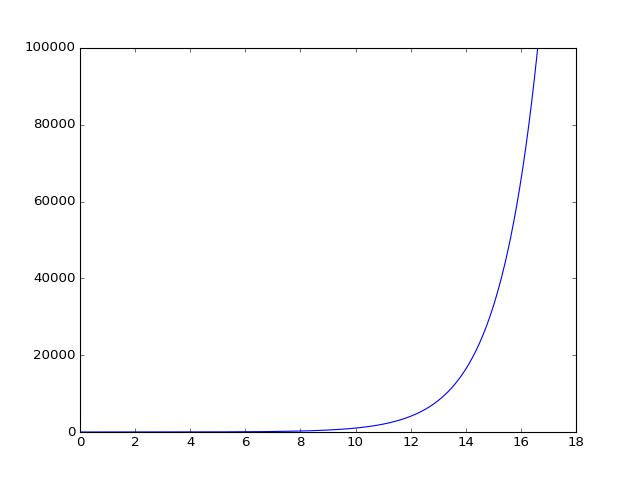

In [99]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
x = np.arange(1,100000)
plt.plot(np.log2(x),x)

De fato, $n = 2^{log_2 n}$. Ou seja, o tempo de execução é exponencial em $\log_2 n$. Ou seja, o algoritmo não é eficiente.

Mas como fazer um algoritmo eficiente para (Primo)?

O primeiro algoritmo considerado eficiente foi publicado em 2002 e é conhecido como o [*Teste de Primalidade de AKS*](https://en.wikipedia.org/wiki/AKS_primality_test) (Agrawal–Kayal–Saxena)

No entanto, na prática esse algoritmo é pouco usado. Apesar de ser eficiente de um ponto de vista teórico, o polinômio que o limita é de grau pelo menos 6.

*Exercício:* Até agora, vimos que ao analisar um algoritmo, a corretude (a resposta é sempre correta) e o tempo de execução são importantes? Quais outras características você consideraria importantes?

# Fatoração

Vamos ver um outro exemplo de problema.

Problema (Fatoração):
- Entrada: inteiro n>0
- Saída: divisores primos de n com suas multiplicidades

Exemplo: 

Entrada: n = 252

Saída: $2^2\cdot 3^2\cdot 7$

Diferentemente de (Primo), não é conhecido nenhum algoritmo eficiente para este problema!

Observação: Neste curso, o modelo computacional que assumimos é o modelo clássico (Máquina de Turing). Um outro modelo computacional de grande interesse atualmente é o modelo da **Computação Quântica**. Nesse modelo, o problema (Fatoração) pode ser resolvido de maneira eficiente pelo Algoritmo de Shor (veja [aqui](https://en.wikipedia.org/wiki/Shor's_algorithm)).

# Criptografia e protocolo RSA

Uma parte de grande importância na computação é a troca de mensagens de maneira segura.

Suponha que temos duas máquina/pessoas/sistemas que querem ser comunicar. Classicamente, chamamos as partes de Alice e Bob.

Alice e Bob se comunicam através de um canal (por exemplo, pela Internet), mas as suas mensagens podem ser interceptadas por outras partes (em geral, chamamos de Eve, como apelido para "eavesdropper").

Alice e Bob querem que mesmo que Eve leia a sua mensagem, ela não consiga entender o conteúdo.

Vamos ver um protocolo bem conhecido chamado RSA.

Suponha que Bob quer mandar para Alice uma mensagem $m$ que é um número inteiro.

Alice tem dois pares de números inteiros: $P = (e, n)$ e $S = (d, n)$.

- $P$ é chamada de chave *pública* e é disponível para todos.
- $S$ é chamada de chave *privada* e é secreta. Ou seja, apenas Alice conhece $S$.


A mensagem $m$ deve ser menor do que $n$. Mensagens maiores podem ser quebrados em várias mensagens.

$e$ e $d$ devem ter uma propriedade muito especial: $m^{ed} = m \ (mod \ n)$ independente do valor de m!

Exemplo: $n = 4399$,  $e = 17$, $d = 1505$.

- Para encriptar a mensagem m, Bob calcular $M = m^e \ (mod \ n)$.
- A mensagem $M$ é mandada pelo canal de comunicação
- Para decifrar a mensagem, Alice calcular $M^d \ (mod \ n)$.

Note que
$M^d = (m^e)^d = m^{ed} = m{}(mod \ n)$

In [103]:
def cifra(m, e, n):
    return pow(m, e, n)

In [101]:
m = 2134
e = 17
n = 4399
M = cifra(m, e, n)
M

1012

In [102]:
d = 1505
decifra(M, d, n)

2134

## Como escolher $e$, $d$ e $n$?

1) Escolha dois inteiros primos grandes $p$ e $q$.

2) Defina $n := p*q$  e defina $f := (p-1)*(q-1)$

3) Escolha $e$ como um número pequeno ímpar tal que $mdc(f, e) = 1$

4) Encontre $d$ tal que $e*d = 1 \ (mod\ f)$

Note que estes passos não são um algoritmo propriamente dito, pois não especificamos como fazer cada passo exatamante. A princípio, nem sabemos se cada passo é possível de ser realizado.

Observação: Uma característica definidora de um algoritmo: um algoritmo deve ser formado por uma sequencia de instruções realizáveis por um computador, precisas e sem ambiguidade!

## Mas como vamos garantir que $m^{ed} = m \ (mod \ n)$? 

A matemática deste algoritmo é linda. Suponha $m\neq 0$.

1) Como $e$ e $d$ satisfazem  $e*d = 1 \ (mod\ f)$, então $e*d = 1 + k*f$, onde $k$ é um inteiro e lembre que $f = (p-1)*(q-1)$. 

2) O Teorema de Fermat é um teorema clássico que nos diz que, para todo primo $p$ e para todo $a \neq 0$, temos que $a^{p-1} = 1 \ (mod\ p)$. Assim, $m^{p-1}=1 \ (mod \ p)$.

3) Então, usando (1), temos que $m^ed = m*m^{(p-1)k(q-1)}$. Usando (2), temos que $m^{p-1} = 1 \ (mod \ p)$. Portanto,
$$
m^ed = m*1^{k(q-1)} = m \ (mod \ p).
$$

4) Similarmente, $m^ed = m \ (mod \ q)$.

5) Uma consequência do Teorem do Resto Chinês, é o seguinte corolário: se $p$ e $q$ são primos, então $x = a \ (mod\ p)$ e $x = a \ (mod \ q)$ se, e somente se, $x = a \ (mod \ pq)$.

Portanto, por (3) e (4), e o corolário acima, $m^{ed} = m \ (mod \ n)$ (lembre-se que $n=pq$).

## Como podemos "quebrar" este protocolo? 

Queremos descobrir $d$ e sabemos $e$ e $n$. 

Basta descobrir $p$ e $q$! Como?

Fatorando $n$. 

Observação: Ou seja, no modelo quântico, este protocolo não funciona bem, pois sabemos fatorar $n$.